<a href="https://colab.research.google.com/github/dhyan1999/DL_ML/blob/master/Cifar10_Resnet50_DataAugmentation%2BEncoderDecoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models,layers,optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
ResNet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
(X_train , y_train) , (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
model = models.Sequential()

# Encoder Layer
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same') )

# Decoder Layer
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)) )

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same') )

In [ ]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
# Feature Extraction
model.fit(X_train, X_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 249us/sample - loss: 0.6879 - val_loss: 0.6866
Epoch 2/50
50000/50000 [==============================] - 5s 96us/sample - loss: 0.6866 - val_loss: 0.6854
Epoch 3/50
50000/50000 [==============================] - 5s 101us/sample - loss: 0.6854 - val_loss: 0.6842
Epoch 4/50
50000/50000 [==============================] - 5s 99us/sample - loss: 0.6842 - val_loss: 0.6830
Epoch 5/50
50000/50000 [==============================] - 5s 101us/sample - loss: 0.6829 - val_loss: 0.6816
Epoch 6/50
50000/50000 [==============================] - 5s 104us/sample - loss: 0.6812 - val_loss: 0.6798
Epoch 7/50
50000/50000 [==============================] - 5s 100us/sample - loss: 0.6797 - val_loss: 0.6786
Epoch 8/50
50000/50000 [==============================] - 5s 104us/sample - loss: 0.6784 - val_loss: 

In [ ]:
model = models.Sequential()

#upsampling to increase image....
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

model.add(ResNet50)

model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='categorical_crossentropy', metrics=['acc'])

**Preparing model with the help of resnet 50 pretrained model with imagenet**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip = True)

In [ ]:
history = model.fit_generator(datagen.flow(X_train, y_train,batch_size = 20), epochs=15, validation_data=(X_test, y_test), steps_per_epoch = len(X_train) // 20)

Epoch 1/15
2500/2500 [==============================] - 886s 355ms/step - loss: 1.6949 - acc: 0.3229 - val_loss: 0.7634 - val_acc: 0.8061
Epoch 2/15
2500/2500 [==============================] - 866s 346ms/step - loss: 1.0534 - acc: 0.6553 - val_loss: 0.4682 - val_acc: 0.8890
Epoch 3/15
2500/2500 [==============================] - 866s 346ms/step - loss: 0.7841 - acc: 0.7788 - val_loss: 0.3602 - val_acc: 0.9146
Epoch 4/15
2500/2500 [==============================] - 863s 345ms/step - loss: 0.6229 - acc: 0.8385 - val_loss: 0.2648 - val_acc: 0.9340
Epoch 5/15
2500/2500 [==============================] - 861s 344ms/step - loss: 0.5063 - acc: 0.8728 - val_loss: 0.2308 - val_acc: 0.9398
Epoch 6/15
2500/2500 [==============================] - 860s 344ms/step - loss: 0.4177 - acc: 0.9018 - val_loss: 0.1980 - val_acc: 0.9451
Epoch 7/15
2500/2500 [==============================] - 861s 344ms/step - loss: 0.3537 - acc: 0.9202 - val_loss: 0.1907 - val_acc: 0.9468
Epoch 8/15
2500/2500 [============

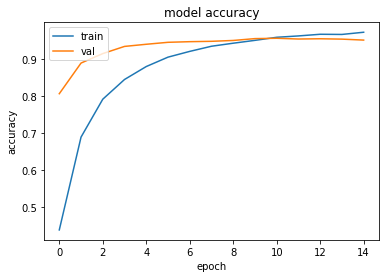

<Figure size 432x288 with 0 Axes>

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig("performance_cifar10.png")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_1 (UpSampling2 multiple                  0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 multiple                  0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 multiple                  0         
_________________________________________________________________
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
batch_normalization (BatchNo multiple                  524288    
_________________________________________________________________
dense (Dense)                multiple                 